<a href="https://colab.research.google.com/github/imranrahman1997/Neural-Network-from-scratch/blob/main/Uses_of_data_augmentation_in_dogs_vs_cats_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eigahiga","key":"0c5d96f4df6519a421bb44205ca56eca"}'}

In [3]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.8MB/s]
 95% 258M/271M [00:01<00:00, 157MB/s]
100% 271M/271M [00:02<00:00, 139MB/s]
 98% 531M/543M [00:03<00:00, 226MB/s]
100% 543M/543M [00:03<00:00, 172MB/s]


In [5]:
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("done")

done


In [6]:
from zipfile import ZipFile

file_name = "/content/test1.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("done")

done


In [8]:
import os, shutil
original_dataset_dir = '/content/train'
base_dir = '/content/dog'
os.path.isdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total validation dog images: 500


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

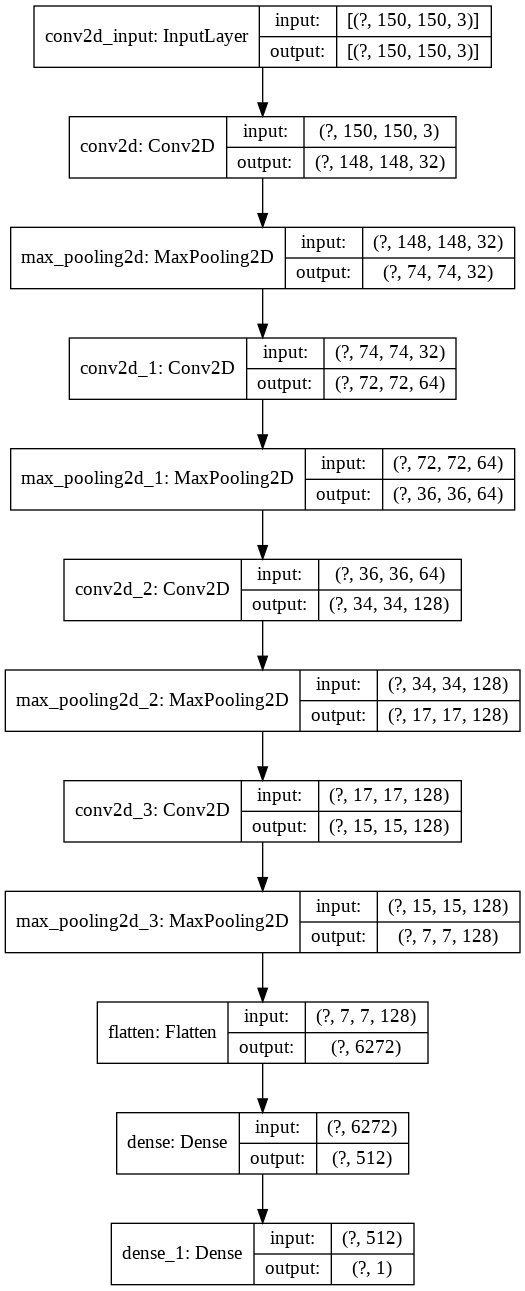

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
from keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6879 - acc: 0.5480 - val_loss: 0.6724 - val_acc: 0.5320
Epoch 2/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6585 - acc: 0.5990 - val_loss: 0.6377 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6210 - acc: 0.6355 - val_loss: 0.6299 - val_acc: 0.6310
Epoch 4/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5697 - acc: 0.7040 - val_loss: 0.6010 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5347 - acc: 0.7315 - val_loss: 0.7461 - val_acc: 0.6210
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5200 - acc: 0.7400 - val_loss: 0.5843 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5007 - acc: 0.7505 - val_loss: 0.6950 - val_acc: 

In [20]:
model.save('cats_and_dogs_small_1.h5')

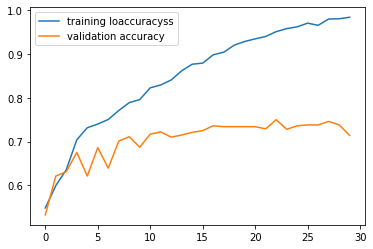

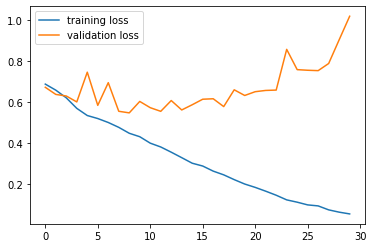

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label = 'training loaccuracyss')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#Using data augmentation

In [22]:
#new model with dropout

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [24]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 18s 177ms/step - loss: 0.6764 - acc: 0.5795 - val_loss: 0.6610 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.6653 - acc: 0.6160 - val_loss: 0.6546 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 18s 175ms/step - loss: 0.6521 - acc: 0.6060 - val_loss: 0.6326 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 17s 175ms/step - loss: 0.6371 - acc: 0.6315 - val_loss: 0.6263 - val_acc: 0.6260
Epoch 5/30
100/100 [==============================] - 18s 175ms/step - loss: 0.6275 - acc: 0.6420 - val_loss: 0.5995 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 18s 177ms/step - loss: 0.6022 - acc: 0.6740 - val_loss: 0.6319 - val_acc: 0.6510
Epoch 7/30
100/100 [==============================] - 18s 178ms/step - loss: 0.6070 - acc: 0.6535 - val_loss: 0.5776 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 1

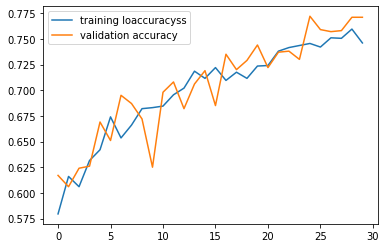

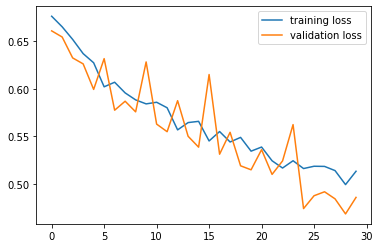

In [33]:
plt.plot(history.history['acc'], label = 'training loaccuracyss')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

By using data augmentation we can easily deal with overfiting